In [19]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits 

In [20]:
alist=fits.open('spec-55976-F5597612_sp08-188.fits.gz')

a=alist[0].data
flux=a[0]
wave=a[2]

redshift=alist[0].header['z']

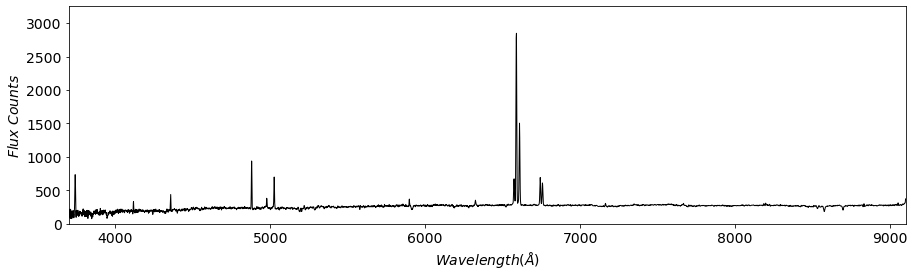

In [21]:
plt.figure(figsize=(15,4))
plt.plot(wave,flux,color='black',linewidth=1)
plt.xlim(3700,9100)
plt.ylim(0,3250)
plt.xlabel(r'$Wavelength (\AA)$',fontsize=14)
plt.ylabel(r'$Flux\ Counts$',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## [OIII] $\lambda 5007$ & H$\beta$ $\lambda 4863$
## [NII] $\lambda 6584$ & H$\alpha$ $\lambda 6563$

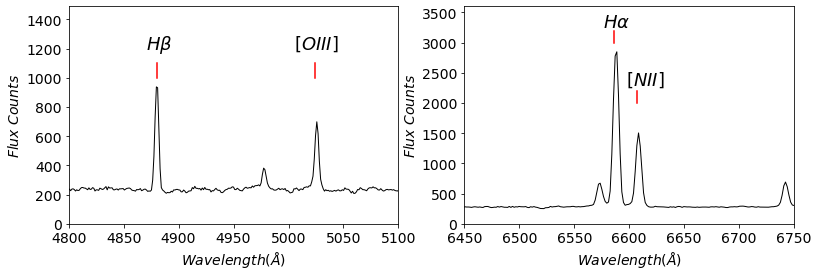

In [22]:
plt.figure(figsize=(13,4))

plt.subplot(121)
plt.plot(wave,flux,color='black',linewidth=1)
# Hbeta
linecenter=np.array([4863,4863])*(1+redshift)
plt.plot(linecenter,[1000,1100],'-',color='red')
plt.text(linecenter[0]-10,1200,r'$H\beta$',fontsize=18)
# [OIII]
linecenter=np.array([5007,5007])*(1+redshift)
plt.plot(linecenter,[1000,1100],'-',color='red')
plt.text(linecenter[0]-20,1200,r'$[OIII]$',fontsize=18)

plt.xlim(4800,5100)
plt.ylim(0,1490)
plt.xlabel(r'$Wavelength (\AA)$',fontsize=14)
plt.ylabel(r'$Flux\ Counts$',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# ---------------

plt.subplot(122)
plt.plot(wave,flux,color='black',linewidth=1)
# Hbeta
linecenter=np.array([6563,6563])*(1+redshift)
plt.plot(linecenter,[3000,3200],'-',color='red')
plt.text(linecenter[0]-10,3250,r'$H\alpha$',fontsize=18)
# [OIII]
linecenter=np.array([6584,6584])*(1+redshift)
plt.plot(linecenter,[2000,2200],'-',color='red')
plt.text(linecenter[0]-10,2300,r'$[NII]$',fontsize=18)

plt.xlim(6450,6750)
plt.ylim(0,3600)
plt.xlabel(r'$Wavelength (\AA)$',fontsize=14)
plt.ylabel(r'$Flux\ Counts$',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [23]:
from __future__ import print_function
from scipy.optimize import curve_fit
from scipy import integrate
import scipy

def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0)**2 / (2 * sigma **2))
def gauss_fit(x,y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
    popt , pcov = curve_fit(gauss, x, y, p0 = [min(y), max(y), mean, sigma])
    return popt

the emission line flux of Hbeta is 6738
the error is 84
the emission line flux of [OIII] is 6064
the error is -103
the emission line flux of Halpha is 16601
the error is -164
the emission line flux of [NII] is 9329
the error is -74


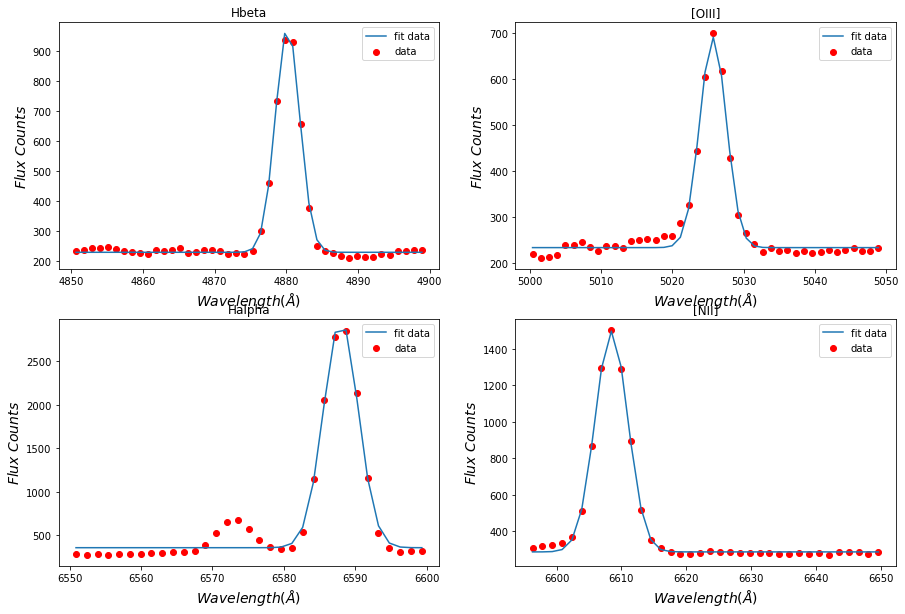

In [26]:
shy = [[4850,4900],[5000,5050],[6550,6600],[6595,6650]]
name = ['Hbeta','[OIII]','Halpha','[NII]']
all_result = []
all_result1 = []
plt.figure(figsize = (15,10))
count = 0
count_ = -1
for i in shy :
    count += 1
    count_ += 1
    index_ = np.where((wave > i[0]) & (wave < i[1]))
    index_1 = index_[0][0]
    index_2 = index_[0][-1]
    x , y = wave[index_1:index_2+1],flux[index_1:index_2+1]
    fit_data = gauss_fit(x,y)
    H,A,x0,sigma= fit_data[0],fit_data[1],fit_data[2],fit_data[-1]  
    y_fit = gauss(x,H,A,x0,sigma)
    
    plt.subplot(2,2,count)
    plt.title(name[count_])
    plt.xlabel(r'$Wavelength (\AA)$',fontsize=14)
    plt.ylabel(r'$Flux\ Counts$',fontsize=14)
    plt.plot(x,y_fit,label = "fit data")
    plt.scatter(x,y,c = "red",label = "data")
    plt.legend()

    #the integrate of point set
    index__ = np.where(y_fit>y_fit[0])
    y_data = y[index__[0][0]:index__[0][-1]+1]
    y_fitdata = y_fit[index__[0][0]:index__[0][-1]+1]
    flux_result = integrate.trapz(y_fitdata)
    flux_result1 = integrate.trapz(y_data)
    all_result.append(flux_result)
    all_result1.append(flux_result1)
    
    print("the emission line flux of {NAME} is".format(NAME=name[count_]),int(flux_result))
    print("the error is",int(flux_result-flux_result1))


In [27]:
# flux ratio
ratio_1 = all_result[1] / all_result[2]
ratio_2 = all_result[3] / all_result[0]
ratio_1_1 = all_result1[1] / all_result1[2]
ratio_2_1 = all_result1[3] / all_result1[0]

print("the flux ratio of [OIII] with Halpha is",ratio_1,"the error is ",ratio_1 - ratio_1_1)
print("the flux ratio of [NII] with Hbeta is",ratio_2,"the error is ",ratio_2 - ratio_2_1)

the flux ratio of [OIII] with Halpha is 0.3652731 the error is  -0.0026180744
the flux ratio of [NII] with Hbeta is 1.3845309 the error is  -0.02885878
